In [3]:
import os
import pickle


In [9]:
policy_names = ["policy_NN",'policy_Sparse']
dynamics_names = ["dynamics_SINDy", 'dynamics_WB']
results = {}
for i in range(2):
    for j in range(2):
        filename = policy_names[i] + "_" + dynamics_names[j] + ".pkl"
        save_dir = "results"
        save_path = os.path.join(save_dir, filename)

        with open(save_path, "rb") as f:
            loaded_data = pickle.load(f)
        results[policy_names[i] + "_" + dynamics_names[j]] = loaded_data


In [10]:
results.keys()

dict_keys(['policy_NN_dynamics_SINDy', 'policy_NN_dynamics_WB', 'policy_Sparse_dynamics_SINDy', 'policy_Sparse_dynamics_WB'])

In [14]:
results['policy_NN_dynamics_SINDy']['traj']['r'][0].shape

torch.Size([501, 2])

In [20]:
nsteps = len(results['policy_NN_dynamics_SINDy']['traj']['r'][0])-1

In [19]:
results['policy_NN_dynamics_SINDy']['traj']['xn'].detach().reshape(nsteps + 1, 2).numpy()[:,:]

RuntimeError: shape '[502, 2]' is invalid for input of size 1002

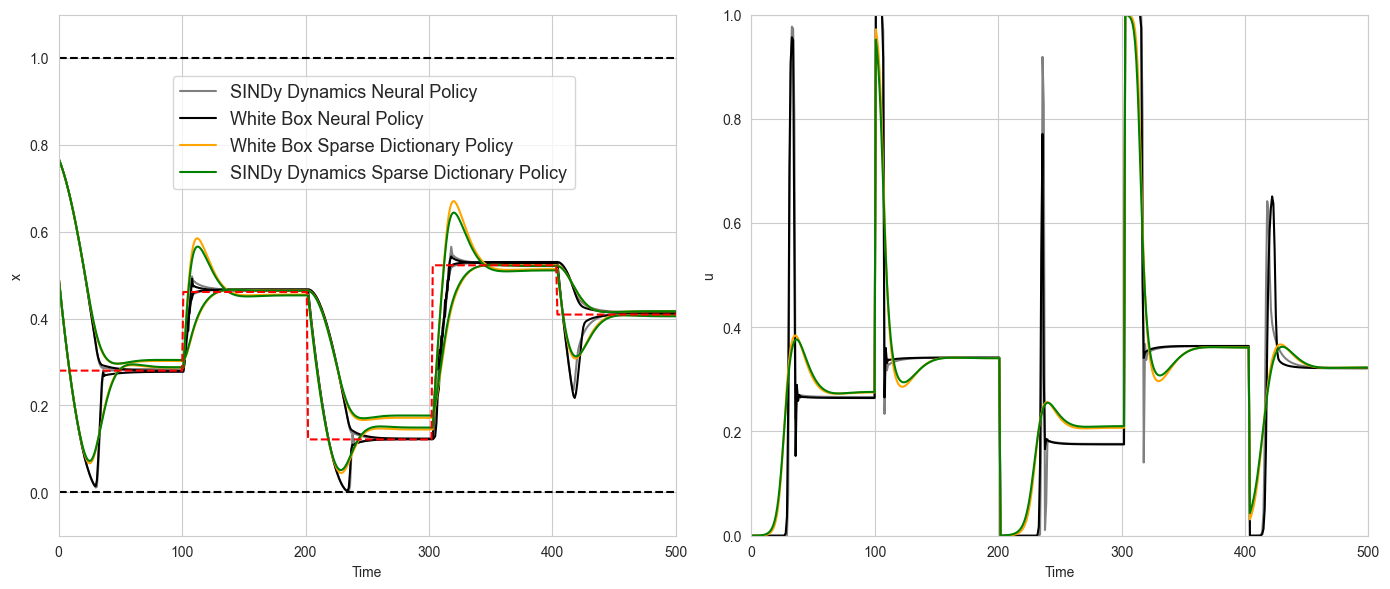

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

nsteps = len(results['policy_NN_dynamics_SINDy']['traj']['r'][0])-1

sns.set_style('whitegrid')
# Generate sample data (Replace these with your actual data)
time = np.arange(nsteps+1)  # Time steps

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Two subplots side by side

# Plot x vs Time
axes[0].plot(time, results['policy_NN_dynamics_SINDy']['traj']['xn'].detach().reshape(nsteps + 1, 2).numpy()[:,0], color='grey', label='SINDy Dynamics Neural Policy')
axes[0].plot(time, results['policy_NN_dynamics_SINDy']['traj']['xn'].detach().reshape(nsteps + 1, 2).numpy()[:,1], color='grey')

axes[0].plot(time, results['policy_NN_dynamics_WB']['traj']['xn'].detach().reshape(nsteps + 1, 2).numpy()[:,0], color='black', label='White Box Neural Policy')
axes[0].plot(time, results['policy_NN_dynamics_WB']['traj']['xn'].detach().reshape(nsteps + 1, 2).numpy()[:,1], color='black')

axes[0].plot(time, results['policy_Sparse_dynamics_WB']['traj']['xn'].detach().reshape(nsteps + 1, 2).numpy()[:,0], color='orange', label='White Box Sparse Dictionary Policy')
axes[0].plot(time, results['policy_Sparse_dynamics_WB']['traj']['xn'].detach().reshape(nsteps + 1, 2).numpy()[:,1], color='orange')

axes[0].plot(time, results['policy_Sparse_dynamics_SINDy']['traj']['xn'].detach().reshape(nsteps + 1, 2).numpy()[:,0], color='green', label='SINDy Dynamics Sparse Dictionary Policy')
axes[0].plot(time, results['policy_Sparse_dynamics_SINDy']['traj']['xn'].detach().reshape(nsteps + 1, 2).numpy()[:,1], color='green')

axes[0].set_xlabel("Time")
axes[0].set_ylabel("x")
axes[0].set_xlim([0, nsteps])
axes[0].set_ylim([-0.1, 1.1])
axes[0].hlines([0, 1], xmin=0, xmax=500.0, colors='black', linestyles='dashed')  # Reference lines
axes[0].plot(time, results['policy_Sparse_dynamics_SINDy']['traj']['r'].detach().reshape(nsteps + 1, 2).numpy()[:,0], 'r--')  # Red dashed line for reference

# Generate sample data (Replace these with your actual data)
time = np.arange(nsteps)
# Plot u vs Time
axes[1].plot(time, results['policy_NN_dynamics_SINDy']['traj']['u'].detach().reshape(nsteps, 2).numpy()[:,0], color='grey', label='SINDy Dynamics Neural Policy')
axes[1].plot(time, results['policy_NN_dynamics_WB']['traj']['u'].detach().reshape(nsteps, 2).numpy()[:,0], color='black', label='White Box Neural Policy')
axes[1].plot(time, results['policy_Sparse_dynamics_WB']['traj']['u'].detach().reshape(nsteps, 2).numpy()[:,0], color='orange', label='White Box Sparse Dictionary Policy')
axes[1].plot(time, results['policy_Sparse_dynamics_SINDy']['traj']['u'].detach().reshape(nsteps, 2).numpy()[:,0], color='green', label='SINDy Dynamics Sparse Dictionary Policy')
axes[1].set_xlabel("Time")
axes[1].set_ylabel("u")
axes[1].set_xlim([0, nsteps])
axes[1].set_ylim([0, 1])

# Add legend
axes[0].legend(loc='upper left', bbox_to_anchor=(0.17, 0.90), fontsize=13)

# Show the plot
plt.tight_layout()
plt.show()
